In [2]:
import alphashape
import os
import numpy as np
import pandas as pd


def make_alpha_hull(xy, alpha=1):
    alpha_shape = alphashape.alphashape(xy, alpha)
    xH, yH = alpha_shape.boundary.coords.xy
    return np.vstack([xH, yH]).T


all_data = []
for keyword in ['random', 'kmeans']:
    df = pd.read_csv(os.path.join('data', 'embeddings', f'polymers-umap-{keyword}.txt'), header=None, names=['Sequence', 'Z0', 'Z1'])
    all_data.append(df)

orig_data = pd.concat(all_data)
orig_hull = make_alpha_hull(orig_data.loc[:, 'Z0':'Z1'])

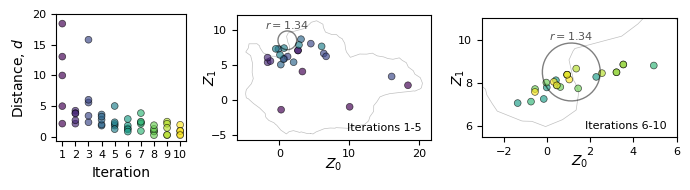

In [8]:
from matplotlib import gridspec
import matplotlib.pyplot as plt
from target_defs import archetype_predictions

data = pd.read_csv(os.path.join('data', 'sample-rollout-membranes-scientific-3.csv'), index_col=0)

fig = plt.figure(figsize=(7, 2.0))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1.5, 1.5])

ax = fig.add_subplot(gs[0, 0])

v = archetype_predictions["membrane"]
data['d'] = np.linalg.norm(data.loc[:, 'Z0':'Z1'].values - v, axis=1)

im = ax.scatter(data['Iteration']+1, data['d'], s=24, c=data['Iteration']+1, ec='k', lw=0.5,
                alpha=0.67, # rasterized=True,
                )

ax.set_xlabel('Iteration', fontsize=10)
ax.set_ylabel('Distance, $d$', fontsize=10)
ax.set_xticks(np.arange(1, 11))
ax.set_yticks(np.arange(0, 21, 5))
ax.tick_params(axis='both', which='major', labelsize=8)

axes = [fig.add_subplot(gs[0, i+1]) for i in range(2)]
labels = ['Iterations 1-5', 'Iterations 6-10']

for i, ax in enumerate(axes):
    
    f = (data.loc[:, 'Iteration'] >= i*5) & (data.loc[:, 'Iteration'] < (i+1)*5)
    im = ax.scatter(*data.loc[f, 'Z0':'Z1'].values.T, c=data.loc[f, 'Iteration']+1, s=24, ec='k', lw=0.5, zorder=1, alpha=0.67, vmin=1, vmax=10)
    
    ax.plot(*orig_hull.T, 'k-', lw=0.5, alpha=0.25, zorder=0)
    
    t = np.linspace(0, 2*np.pi)
    circ_points = np.vstack([np.cos(t), np.sin(t)]).T  # radius = 1
    v = archetype_predictions["membrane"]
    
    ax.plot(*(1.34 * circ_points + v).T, 'k-', lw=1.0, alpha=0.5, zorder=2)
    
    ax.set_xlabel('$Z_0$', labelpad=-2, fontsize=10)
    ax.set_ylabel('$Z_1$', labelpad=-6, fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    
    ax.set_aspect('equal')
    
    
    ax.text(v[0], v[1]+1.4, '$r = 1.34$', va='bottom', ha='center', alpha=0.67, fontsize=8)
    ax.text(0.95, 0.05, labels[i], transform=ax.transAxes, va='bottom', ha='right', fontsize=8)
    
axes[1].set_xlim(-3, 6)
axes[1].set_ylim(5.5, 11)

fig.tight_layout()

In [ ]:
fig.savefig(os.path.join('figures', 'fig1-rollout.pdf'), dpi=600, bbox_inches='tight')